**LAB 2**

NAME - EMMANUEL UCHENNA ORUNTA
ID - S00403657

Note- the dataset used for this analysis was gotten from kaggle as instructed in the lab, this takes care of task 1

TASK 2

In [38]:
# Task 2.1 Examine the Berlin dataset to discover essential details such as the total
# number of properties listed, the various features included, and if there are any missing
# data points that should be excluded from your analysis. What additional insights can
# you glean from the dataset?


import pandas as pd
# Load dataset into a Data Frame
file_path = "/content/berlin-listings.csv"
df = pd.read_csv(file_path)

# 1. Shape of dataset (rows, columns)
print("Total number of properties (rows):", df.shape[0])
print("Total number of features (columns):", df.shape[1])

# 2. Basic information about dataset
print("\n--- Dataset Info ---")
print(df.info())

# 3. Check for missing values and their percentage
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / df.shape[0]) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Missing %": missing_percentage.round(2)
})

print("\n--- Top 15 columns with most missing values ---")
print(missing_summary.head(15))

# 4. Unique room types
print("\n--- Unique Room Types ---")
print(df['room_type'].unique())

Total number of properties (rows): 20053
Total number of features (columns): 96

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20053 entries, 0 to 20052
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20053 non-null  int64  
 1   id                                20053 non-null  int64  
 2   listing_url                       20053 non-null  object 
 3   scrape_id                         20053 non-null  int64  
 4   last_scraped                      20053 non-null  object 
 5   name                              19958 non-null  object 
 6   summary                           19105 non-null  object 
 7   space                             12640 non-null  object 
 8   description                       20044 non-null  object 
 9   experiences_offered               20053 non-null  object 
 10  neighborhood_overview       

In [39]:
# Task 2.2: Address the missing data within the dataset by appropriately filling in each
# missing value, ensuring the correct data type is maintained for each property.


from sklearn.preprocessing import LabelEncoder

# Step 1: Drop columns with too many missing values (>90%)
threshold = 0.9
df = df.loc[:, df.isnull().mean() < threshold]

# Step 2: Fill missing values
# -----------------------------
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Numerical columns: fill with mean
        df[col].fillna(df[col].mean(), inplace=True)

    elif df[col].dtype == 'object':
        # Categorical columns: fill with 'Unknown'
        df[col].fillna('Unknown', inplace=True)

    elif df[col].dtype == 'bool':
        # Boolean columns: fill with False
        df[col].fillna(False, inplace=True)

    else:
        # Other types (e.g., datetime) → forward fill
        df[col].fillna(method='ffill', inplace=True)



# Step 4: Check missing values & dataset shape
# -----------------------------
print("Missing values after cleaning:", df.isnull().sum().sum())
print("Dataset shape after cleaning:", df.shape)


/tmp/ipython-input-1201633965.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1201633965.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Missing values after cleaning: 0
Dataset shape after cleaning: (20053, 91)


In [40]:
df_cleaned = df

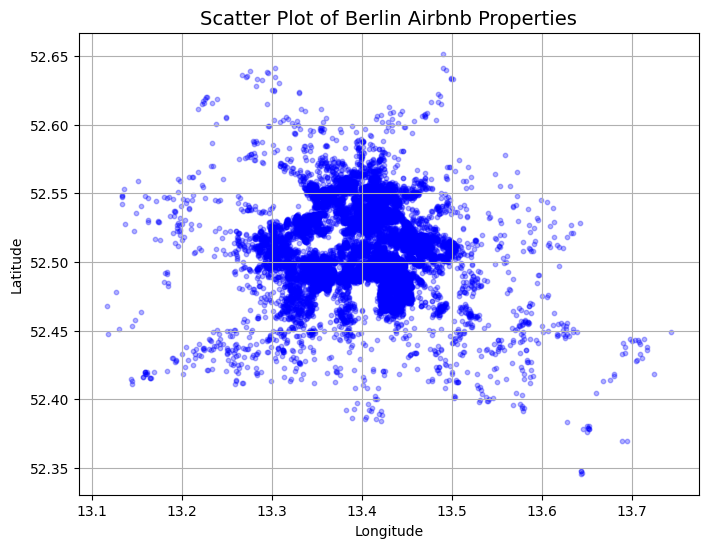

In [41]:
# Task 2.3: Utilize data visualization techniques to explore the dataset further. For
# instance, create a scatter plot displaying all properties with latitude on the x-axis and
# longitude on the y-axis. What narratives or trends can be discerned from this
# visualization?


import matplotlib.pyplot as plt

# Scatter plot of latitude vs longitude
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['longitude'], df_cleaned['latitude'], alpha=0.3, s=10, c='blue')
plt.title("Scatter Plot of Berlin Airbnb Properties", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


The scatter plot above shows that Airbnb listings in Berlin are highly concentrated in the central districts, particularly around popular tourist areas, with density decreasing towards the outskirts. A few outliers exist in suburban regions, likely catering to niche or long-stay visitors. This pattern highlights how demand for short-term rentals is strongest near the city center where attractions and transport links are located.

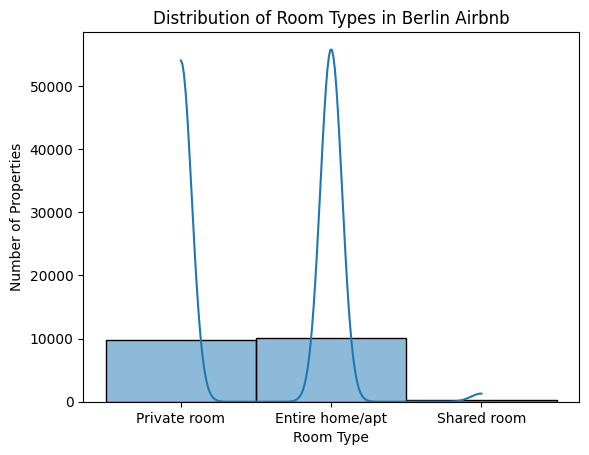

In [42]:
# Task 2.4: Generate a histogram to analyze the distribution of room types among the
# properties. How many properties are there for each room type? What conclusions or
# observations can you draw from this visualization?

import seaborn as sns

# Task 2.4: Histogram (bar plot) of room types

sns.histplot(df_cleaned['room_type'], bins=3, kde=True)

plt.title("Distribution of Room Types in Berlin Airbnb")
plt.xlabel("Room Type")
plt.ylabel("Number of Properties")
plt.show()


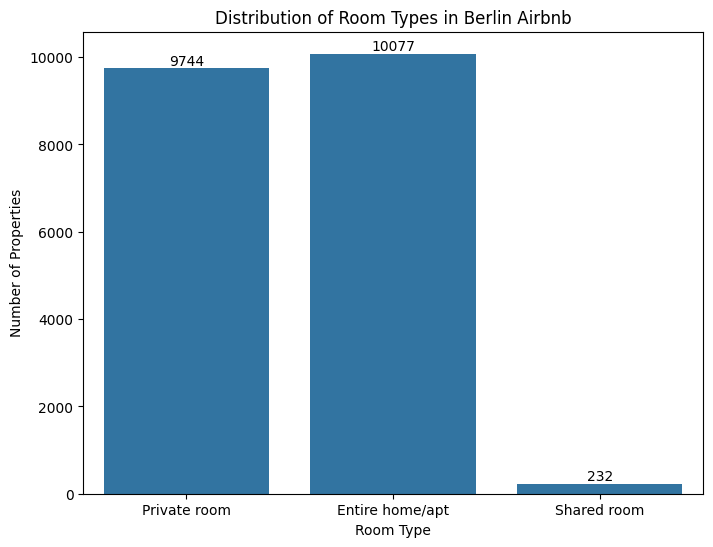

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
# Use the original 'room_type' column from the df DataFrame for correct labels
ax = sns.countplot(data=df, x='room_type')

plt.title("Distribution of Room Types in Berlin Airbnb")
plt.xlabel("Room Type")
plt.ylabel("Number of Properties")

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Based on the bar plot showing the distribution of room types, here are some observations:

- Dominance of Private Rooms and Entire Homes/Apartments: The plot clearly shows that "Private room" and "Entire home/apt" are the most common room types in the Berlin Airbnb dataset, with a very similar number of listings for each.
- Limited Number of Shared Rooms: The number of "Shared room" listings is significantly lower compared to the other two categories. This suggests that shared accommodations are not as prevalent in the Berlin market represented by this dataset.
- These observations may indicate that travelers looking for Airbnb accommodations in Berlin are most likely to find either a private room within a shared dwelling or an entire place to themselves, while shared room options are much less common.

**TASK 3**: Demonstrate your analytical capabilities. What additional aspects of the data are you interested in investigating to glean more insights? How would you go about extracting and interpreting this information from the dataset?

Below, I asked more deeper questions about my dataset and I got some insights on more questions such as
- Which room types are generally more expensive.
- Can compare tourist-heavy vs. residential areas.
- Do higher-priced listings get more reviews?

/tmp/ipython-input-1895184551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df_cleaned, palette='Set3')


Text(0, 0.5, 'Price (€)')

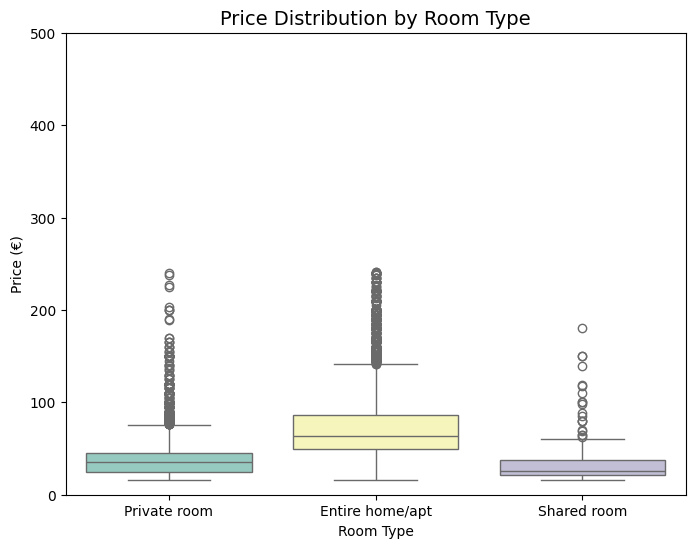

In [44]:
# Price distribution by room type
#This helps us see how much each room type costs on average.

# Boxplot of prices by room type
plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price', data=df_cleaned, palette='Set3')
plt.ylim(0, 500)  # limit to filter extreme outliers for better visibility
plt.title("Price Distribution by Room Type", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Price (€)")

/tmp/ipython-input-3696618743.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")


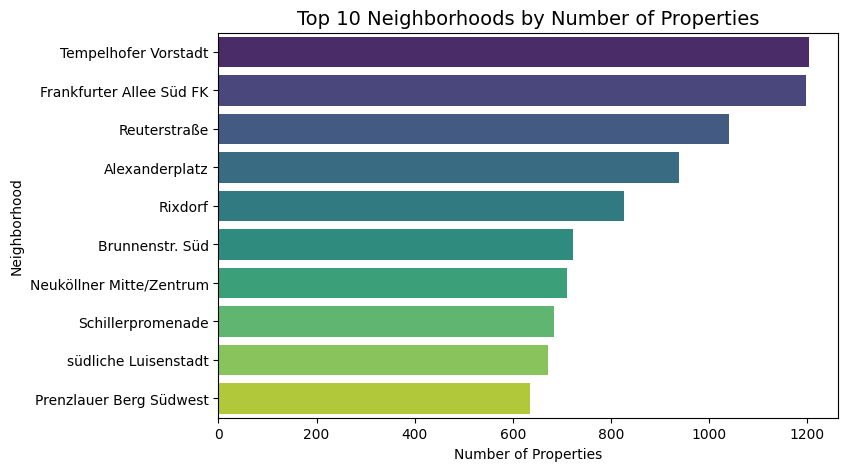

In [45]:
# 2. Most common neighborhoods
# Which areas in Berlin have the highest concentration of listings?

# Top 10 neighborhoods by number of properties
top_neighborhoods = df_cleaned['neighbourhood_cleansed'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")
plt.title("Top 10 Neighborhoods by Number of Properties", fontsize=14)
plt.xlabel("Number of Properties")
plt.ylabel("Neighborhood")
plt.show()

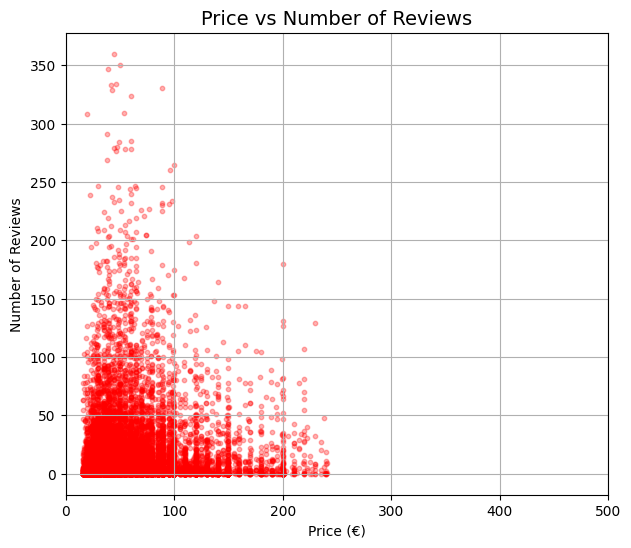

In [46]:
# 3. Reviews vs. Price
# Do higher-priced listings get more reviews?

plt.figure(figsize=(7,6))
plt.scatter(df_cleaned['price'], df_cleaned['number_of_reviews'], alpha=0.3, s=10, c='red')
plt.xlim(0, 500)   # filter out extreme outliers for clarity
plt.title("Price vs Number of Reviews", fontsize=14)
plt.xlabel("Price (€)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()